In [100]:
#####################
# Library Loading
#####################
suppressPackageStartupMessages({
    library(Seurat)
    library(cowplot)
    library(tidyverse)
    library(repr)
    library(scales)
    library(hash)
    library(ggsci)
    library(ggrepel)
})

In [101]:
#####################
# Color Pallett
#####################
JCO_PALLETT = pal_jco("default")(10)
PLOTLY_Pallett = c('#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf')
DEFAULT_PALLETT = PLOTLY_Pallett
GroupID_Order_List = c("CCR6neg", "CCR6low", "CCR6int", "CCR6high")
GroupID_Color_List = c("CCR6neg"="#FFA500", "CCR6low"="#0456f8", "CCR6int"="#1D8F06", "CCR6high"="#e51134")

In [102]:
######################
# LOAD DATA
######################
alldata <- readRDS("./Result/CCR6_Project_04_TSNE_Clustering.rds")

In [103]:
###############
#
###############
Cluster_Resolution = 'RNA_snn_res.0.2'
new_cluster_name_List <- c("BMW", "FORD", "FERRARI", "PORSCHE", "TOYOTA", "ACURA", "HONDA", "DODGE", "GMC", "AUDI", "TESLA", "MAZDA", "KARMA", "SMART")

In [104]:
####################
#FEATURE ORDER/COLOR
####################
Feature_Order_List = new_cluster_name_List
Feature_List_Size = length(Feature_Order_List)
Feature_Label_Dict = Feature_Order_List
names(Feature_Label_Dict) = Feature_Order_List
Feature_Order_Factor = factor(Feature_Order_List, levels=Feature_Order_List)
if(Feature_List_Size > 10){
    Feature_Color_List = colorRampPalette(DEFAULT_PALLETT)(Feature_List_Size)
}else{
    Feature_Color_List = DEFAULT_PALLETT[1:Feature_List_Size]
}
Feature_Color_Dict = Feature_Color_List
names(Feature_Color_Dict) = Feature_Order_List


In [105]:
#################
#Rename clusters
#################
label_alldata <- SetIdent(alldata, value = Cluster_Resolution)
#
old_cluster_name_List = levels(label_alldata@meta.data[[Cluster_Resolution]])
names(new_cluster_name_List) <- old_cluster_name_List
#
label_alldata <- RenameIdents(label_alldata, new_cluster_name_List)
#head(alldata@meta.data)

label_DF = as.data.frame(label_alldata@active.ident) %>% 
    rownames_to_column(var="UMI") %>%
    rename(cluster_label = `label_alldata@active.ident`)
head(label_DF)

UMI,cluster_label
CCR6neg_AAACCTGCAGTTCATG-1,BMW
CCR6neg_AAACCTGGTAAGGGCT-1,FORD
CCR6neg_AAACCTGTCAACCATG-1,BMW
CCR6neg_AAACCTGTCAGCATGT-1,ACURA
CCR6neg_AAACGGGAGTCAAGCG-1,TOYOTA
CCR6neg_AAACGGGGTCTTCAAG-1,FERRARI


In [106]:
#################
#Color clusters
#################
color_alldata <- RenameIdents(label_alldata, Feature_Color_Dict)
#head(alldata@meta.data)

color_DF = as.data.frame(color_alldata@active.ident) %>% 
    rownames_to_column(var="UMI") %>%
    rename(cluster_color = `color_alldata@active.ident`)
head(color_DF)

UMI,cluster_color
CCR6neg_AAACCTGCAGTTCATG-1,#1F77B4
CCR6neg_AAACCTGGTAAGGGCT-1,#BA7C41
CCR6neg_AAACCTGTCAACCATG-1,#1F77B4
CCR6neg_AAACCTGTCAGCATGT-1,#B7446C
CCR6neg_AAACGGGAGTCAAGCG-1,#AE4228
CCR6neg_AAACGGGGTCTTCAAG-1,#AD8B19


In [107]:
######################
# Extract metadata from Seurat object
######################
metadata_DF = as.data.frame(alldata@meta.data) %>% 
    rownames_to_column(var="UMI")
head(metadata_DF)

UMI,orig.ident,nCount_RNA,nFeature_RNA,percent_mito,percent_ribo,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.2
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0
CCR6neg_AAACCTGGTAAGGGCT-1,CCR6neg,4834,1187,3.289201,53.62019,1,1,1
CCR6neg_AAACCTGTCAACCATG-1,CCR6neg,4677,1358,3.912765,45.90549,2,0,0
CCR6neg_AAACCTGTCAGCATGT-1,CCR6neg,4715,1246,3.753977,46.76564,4,5,5
CCR6neg_AAACGGGAGTCAAGCG-1,CCR6neg,1885,711,4.562334,46.73740,0,4,4
CCR6neg_AAACGGGGTCTTCAAG-1,CCR6neg,2735,977,3.363803,41.20658,0,2,2


In [108]:
######################
# Merge Identites
######################
label_metadata_DF = metadata_DF %>%
    inner_join(label_DF, by = c("UMI", "UMI")) %>%
    inner_join(color_DF, by = c("UMI", "UMI"))
head(label_metadata_DF)

UMI,orig.ident,nCount_RNA,nFeature_RNA,percent_mito,percent_ribo,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.2,cluster_label,cluster_color
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0,BMW,#1F77B4
CCR6neg_AAACCTGGTAAGGGCT-1,CCR6neg,4834,1187,3.289201,53.62019,1,1,1,FORD,#BA7C41
CCR6neg_AAACCTGTCAACCATG-1,CCR6neg,4677,1358,3.912765,45.90549,2,0,0,BMW,#1F77B4
CCR6neg_AAACCTGTCAGCATGT-1,CCR6neg,4715,1246,3.753977,46.76564,4,5,5,ACURA,#B7446C
CCR6neg_AAACGGGAGTCAAGCG-1,CCR6neg,1885,711,4.562334,46.73740,0,4,4,TOYOTA,#AE4228
CCR6neg_AAACGGGGTCTTCAAG-1,CCR6neg,2735,977,3.363803,41.20658,0,2,2,FERRARI,#AD8B19


In [109]:
######################
# Extract tSNE from Seurat object
######################
tSNE_DF = as.data.frame(alldata@reductions$TSNE_on_RNA@cell.embeddings) %>%
    rownames_to_column(var="UMI")
head(tSNE_DF)

UMI,tSNE_1,tSNE_2
CCR6neg_AAACCTGCAGTTCATG-1,1.213328,-7.427609
CCR6neg_AAACCTGGTAAGGGCT-1,16.620667,1.273743
CCR6neg_AAACCTGTCAACCATG-1,-7.480344,-5.849165
CCR6neg_AAACCTGTCAGCATGT-1,-11.954786,-17.432102
CCR6neg_AAACGGGAGTCAAGCG-1,-14.644414,19.906003
CCR6neg_AAACGGGGTCTTCAAG-1,-4.153275,5.271901


In [110]:
######################
# merge
######################
metadata_tSNE_DF = label_metadata_DF %>%
    inner_join(tSNE_DF, by = c("UMI", "UMI"))
head(metadata_tSNE_DF)

UMI,orig.ident,nCount_RNA,nFeature_RNA,percent_mito,percent_ribo,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.2,cluster_label,cluster_color,tSNE_1,tSNE_2
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0,BMW,#1F77B4,1.213328,-7.427609
CCR6neg_AAACCTGGTAAGGGCT-1,CCR6neg,4834,1187,3.289201,53.62019,1,1,1,FORD,#BA7C41,16.620667,1.273743
CCR6neg_AAACCTGTCAACCATG-1,CCR6neg,4677,1358,3.912765,45.90549,2,0,0,BMW,#1F77B4,-7.480344,-5.849165
CCR6neg_AAACCTGTCAGCATGT-1,CCR6neg,4715,1246,3.753977,46.76564,4,5,5,ACURA,#B7446C,-11.954786,-17.432102
CCR6neg_AAACGGGAGTCAAGCG-1,CCR6neg,1885,711,4.562334,46.73740,0,4,4,TOYOTA,#AE4228,-14.644414,19.906003
CCR6neg_AAACGGGGTCTTCAAG-1,CCR6neg,2735,977,3.363803,41.20658,0,2,2,FERRARI,#AD8B19,-4.153275,5.271901


In [111]:
######################
# Centroids of each cluster
######################
selected_metadata_tSNE_DF = metadata_tSNE_DF %>%
    select(UMI, cluster_label, tSNE_1, tSNE_2)
head(selected_metadata_tSNE_DF)
centroids = selected_metadata_tSNE_DF %>%
    group_by(cluster_label) %>%
    summarize(tSNE_1_centroids = mean(tSNE_1), tSNE_2_centroids = mean(tSNE_2))
head(centroids)


min_exp = min(selected_metadata_tSNE_DF$tSNE_1, selected_metadata_tSNE_DF$tSNE_2) - 0.1
max_exp = max(selected_metadata_tSNE_DF$tSNE_1, selected_metadata_tSNE_DF$tSNE_2) + 0.1

UMI,cluster_label,tSNE_1,tSNE_2
CCR6neg_AAACCTGCAGTTCATG-1,BMW,1.213328,-7.427609
CCR6neg_AAACCTGGTAAGGGCT-1,FORD,16.620667,1.273743
CCR6neg_AAACCTGTCAACCATG-1,BMW,-7.480344,-5.849165
CCR6neg_AAACCTGTCAGCATGT-1,ACURA,-11.954786,-17.432102
CCR6neg_AAACGGGAGTCAAGCG-1,TOYOTA,-14.644414,19.906003
CCR6neg_AAACGGGGTCTTCAAG-1,FERRARI,-4.153275,5.271901


cluster_label,tSNE_1_centroids,tSNE_2_centroids
BMW,-6.1688946,-5.6079842
FORD,14.4399598,8.4353974
FERRARI,-8.8779112,6.8802550
PORSCHE,9.3689165,-0.6872476
TOYOTA,0.8889279,17.0751099
ACURA,-11.4608617,-17.0367656


In [112]:
#####################
#CCR6neg
#####################
CCR6neg_metadata_tSNE_DF = metadata_tSNE_DF %>%
    mutate(cluster_color = ifelse(!orig.ident== "CCR6neg", "grey85", as.character(cluster_color)))
CCR6low_metadata_tSNE_DF = metadata_tSNE_DF %>%
    mutate(cluster_color = ifelse(!orig.ident== "CCR6low", "grey85", as.character(cluster_color)))
CCR6int_metadata_tSNE_DF = metadata_tSNE_DF %>%
    mutate(cluster_color = ifelse(!orig.ident== "CCR6int", "grey85", as.character(cluster_color)))
CCR6high_metadata_tSNE_DF = metadata_tSNE_DF %>%
    mutate(cluster_color = ifelse(!orig.ident== "CCR6high", "grey85", as.character(cluster_color)))

In [129]:
theme_set(theme_bw())
####################
# ScatterPlot CCR6neg
####################
CCR6neg_metadata_tSNE_ScatterPlot_Object = ggplot(CCR6neg_metadata_tSNE_DF, aes(x=tSNE_1, y=tSNE_2)) +
    geom_point(size=0.5, color=CCR6neg_metadata_tSNE_DF$cluster_color)  +
    geom_label_repel(data = centroids, aes(label =cluster_label ,y = tSNE_2_centroids, x = tSNE_1_centroids), 
               show.legend = FALSE, size=2,point.padding = NA, color="black"
              ) +
    xlim(min_exp, max_exp) +
    ylim(min_exp, max_exp) +
    labs(title = "CCR6neg", subtitle = NULL, caption = NULL, tag = NULL, x="tSNE-1", y="tSNE-2") +
    #scale_color_manual(breaks = Feature_Order_List, labels=Feature_Label_Dict, values=Feature_Color_Dict) +
    guides(color = guide_legend(override.aes = list(size=5))) +
    #annotate(geom="segment", x = -Inf, y = -Inf, xend=-Inf, yend=5, arrow = arrow(length = unit(10, "mm"))) +
    theme(
        ###LEGEND
        aspect.ratio=1,
        legend.position="right",
        legend.title = element_blank(),
        legend.key=element_blank(),
        #legend.key.size = unit(2,"line"),
        legend.text.align = 0,
        legend.text = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
        legend.background = element_blank(),
        #legend.box.margin=LEGEND_BOX_MARGIN,
        #legend.margin=LEGEND_MARGIN,
        ###
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        #plot.margin = SCATTER_MARGIN,
        axis.line = element_line(colour = "black"),
        axis.ticks = element_blank(),
        axis.text = element_blank(),
        axis.title.x = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, hjust =0),
        axis.title.y = element_text(size=10,  family="sans", face="plain", color = "black", angle=90, hjust =0),
        axis.line.x.top = element_line(size=0.1),
        axis.line.x.bottom = element_line(size=0.1),
        axis.line.y.left = element_line(size=0.1),
        axis.line.y.right = element_line(size=0.1),
        #
        
        
    )
####################
# ScatterPlot CCR6low
####################
CCR6low_metadata_tSNE_ScatterPlot_Object = ggplot(CCR6low_metadata_tSNE_DF, aes(x=tSNE_1, y=tSNE_2)) +
    geom_point(size=0.5, color=CCR6low_metadata_tSNE_DF$cluster_color)  +
    geom_label_repel(data = centroids, aes(label =cluster_label ,y = tSNE_2_centroids, x = tSNE_1_centroids), 
               show.legend = FALSE, size=2,point.padding = NA, color="black"
              ) +
    xlim(min_exp, max_exp) +
    ylim(min_exp, max_exp) +
    labs(title = "CCR6low", subtitle = NULL, caption = NULL, tag = NULL, x="tSNE-1", y="tSNE-2") +
    #scale_color_manual(breaks = Feature_Order_List, labels=Feature_Label_Dict, values=Feature_Color_Dict) +
    guides(color = guide_legend(override.aes = list(size=5))) +
    #annotate(geom="segment", x = -Inf, y = -Inf, xend=-Inf, yend=5, arrow = arrow(length = unit(10, "mm"))) +
    theme(
        ###LEGEND
        aspect.ratio=1,
        legend.position="right",
        legend.title = element_blank(),
        legend.key=element_blank(),
        #legend.key.size = unit(2,"line"),
        legend.text.align = 0,
        legend.text = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
        legend.background = element_blank(),
        #legend.box.margin=LEGEND_BOX_MARGIN,
        #legend.margin=LEGEND_MARGIN,
        ###
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        #plot.margin = SCATTER_MARGIN,
        axis.line = element_line(colour = "black"),
        axis.ticks = element_blank(),
        axis.text = element_blank(),
        axis.title.x = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, hjust =0),
        axis.title.y = element_text(size=10,  family="sans", face="plain", color = "black", angle=90, hjust =0),
        axis.line.x.top = element_line(size=0.1),
        axis.line.x.bottom = element_line(size=0.1),
        axis.line.y.left = element_line(size=0.1),
        axis.line.y.right = element_line(size=0.1),
        #
        
        
    )
####################
# ScatterPlot CCR6int
####################
CCR6int_metadata_tSNE_ScatterPlot_Object = ggplot(CCR6int_metadata_tSNE_DF, aes(x=tSNE_1, y=tSNE_2)) +
    geom_point(size=0.5, color=CCR6int_metadata_tSNE_DF$cluster_color)  +
    geom_label_repel(data = centroids, aes(label =cluster_label ,y = tSNE_2_centroids, x = tSNE_1_centroids), 
               show.legend = FALSE, size=2,point.padding = NA, color="black"
              ) +
    xlim(min_exp, max_exp) +
    ylim(min_exp, max_exp) +
    labs(title = "CCR6int", subtitle = NULL, caption = NULL, tag = NULL, x="tSNE-1", y="tSNE-2") +
    #scale_color_manual(breaks = Feature_Order_List, labels=Feature_Label_Dict, values=Feature_Color_Dict) +
    guides(color = guide_legend(override.aes = list(size=5))) +
    #annotate(geom="segment", x = -Inf, y = -Inf, xend=-Inf, yend=5, arrow = arrow(length = unit(10, "mm"))) +
    theme(
        ###LEGEND
        aspect.ratio=1,
        legend.position="right",
        legend.title = element_blank(),
        legend.key=element_blank(),
        #legend.key.size = unit(2,"line"),
        legend.text.align = 0,
        legend.text = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
        legend.background = element_blank(),
        #legend.box.margin=LEGEND_BOX_MARGIN,
        #legend.margin=LEGEND_MARGIN,
        ###
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        #plot.margin = SCATTER_MARGIN,
        axis.line = element_line(colour = "black"),
        axis.ticks = element_blank(),
        axis.text = element_blank(),
        axis.title.x = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, hjust =0),
        axis.title.y = element_text(size=10,  family="sans", face="plain", color = "black", angle=90, hjust =0),
        axis.line.x.top = element_line(size=0.1),
        axis.line.x.bottom = element_line(size=0.1),
        axis.line.y.left = element_line(size=0.1),
        axis.line.y.right = element_line(size=0.1),
        #
        
        
    )
####################
# ScatterPlot CCR6high
####################
CCR6high_metadata_tSNE_ScatterPlot_Object = ggplot(CCR6high_metadata_tSNE_DF, aes(x=tSNE_1, y=tSNE_2)) +
    geom_point(size=0.5, color=CCR6high_metadata_tSNE_DF$cluster_color)  +
    geom_label_repel(data = centroids, aes(label =cluster_label ,y = tSNE_2_centroids, x = tSNE_1_centroids), 
               show.legend = FALSE, size=2,point.padding = NA, color="black"
              ) +
    xlim(min_exp, max_exp) +
    ylim(min_exp, max_exp) +
    labs(title = "CCR6high", subtitle = NULL, caption = NULL, tag = NULL, x="tSNE-1", y="tSNE-2") +
    #scale_color_manual(breaks = Feature_Order_List, labels=Feature_Label_Dict, values=Feature_Color_Dict) +
    guides(color = guide_legend(override.aes = list(size=5))) +
    #annotate(geom="segment", x = -Inf, y = -Inf, xend=-Inf, yend=5, arrow = arrow(length = unit(10, "mm"))) +
    theme(
        ###LEGEND
        aspect.ratio=1,
        legend.position="right",
        legend.title = element_blank(),
        legend.key=element_blank(),
        #legend.key.size = unit(2,"line"),
        legend.text.align = 0,
        legend.text = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
        legend.background = element_blank(),
        #legend.box.margin=LEGEND_BOX_MARGIN,
        #legend.margin=LEGEND_MARGIN,
        ###
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        #plot.margin = SCATTER_MARGIN,
        axis.line = element_line(colour = "black"),
        axis.ticks = element_blank(),
        axis.text = element_blank(),
        axis.title.x = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, hjust =0),
        axis.title.y = element_text(size=10,  family="sans", face="plain", color = "black", angle=90, hjust =0),
        axis.line.x.top = element_line(size=0.1),
        axis.line.x.bottom = element_line(size=0.1),
        axis.line.y.left = element_line(size=0.1),
        axis.line.y.right = element_line(size=0.1),
        #
        
        
    )

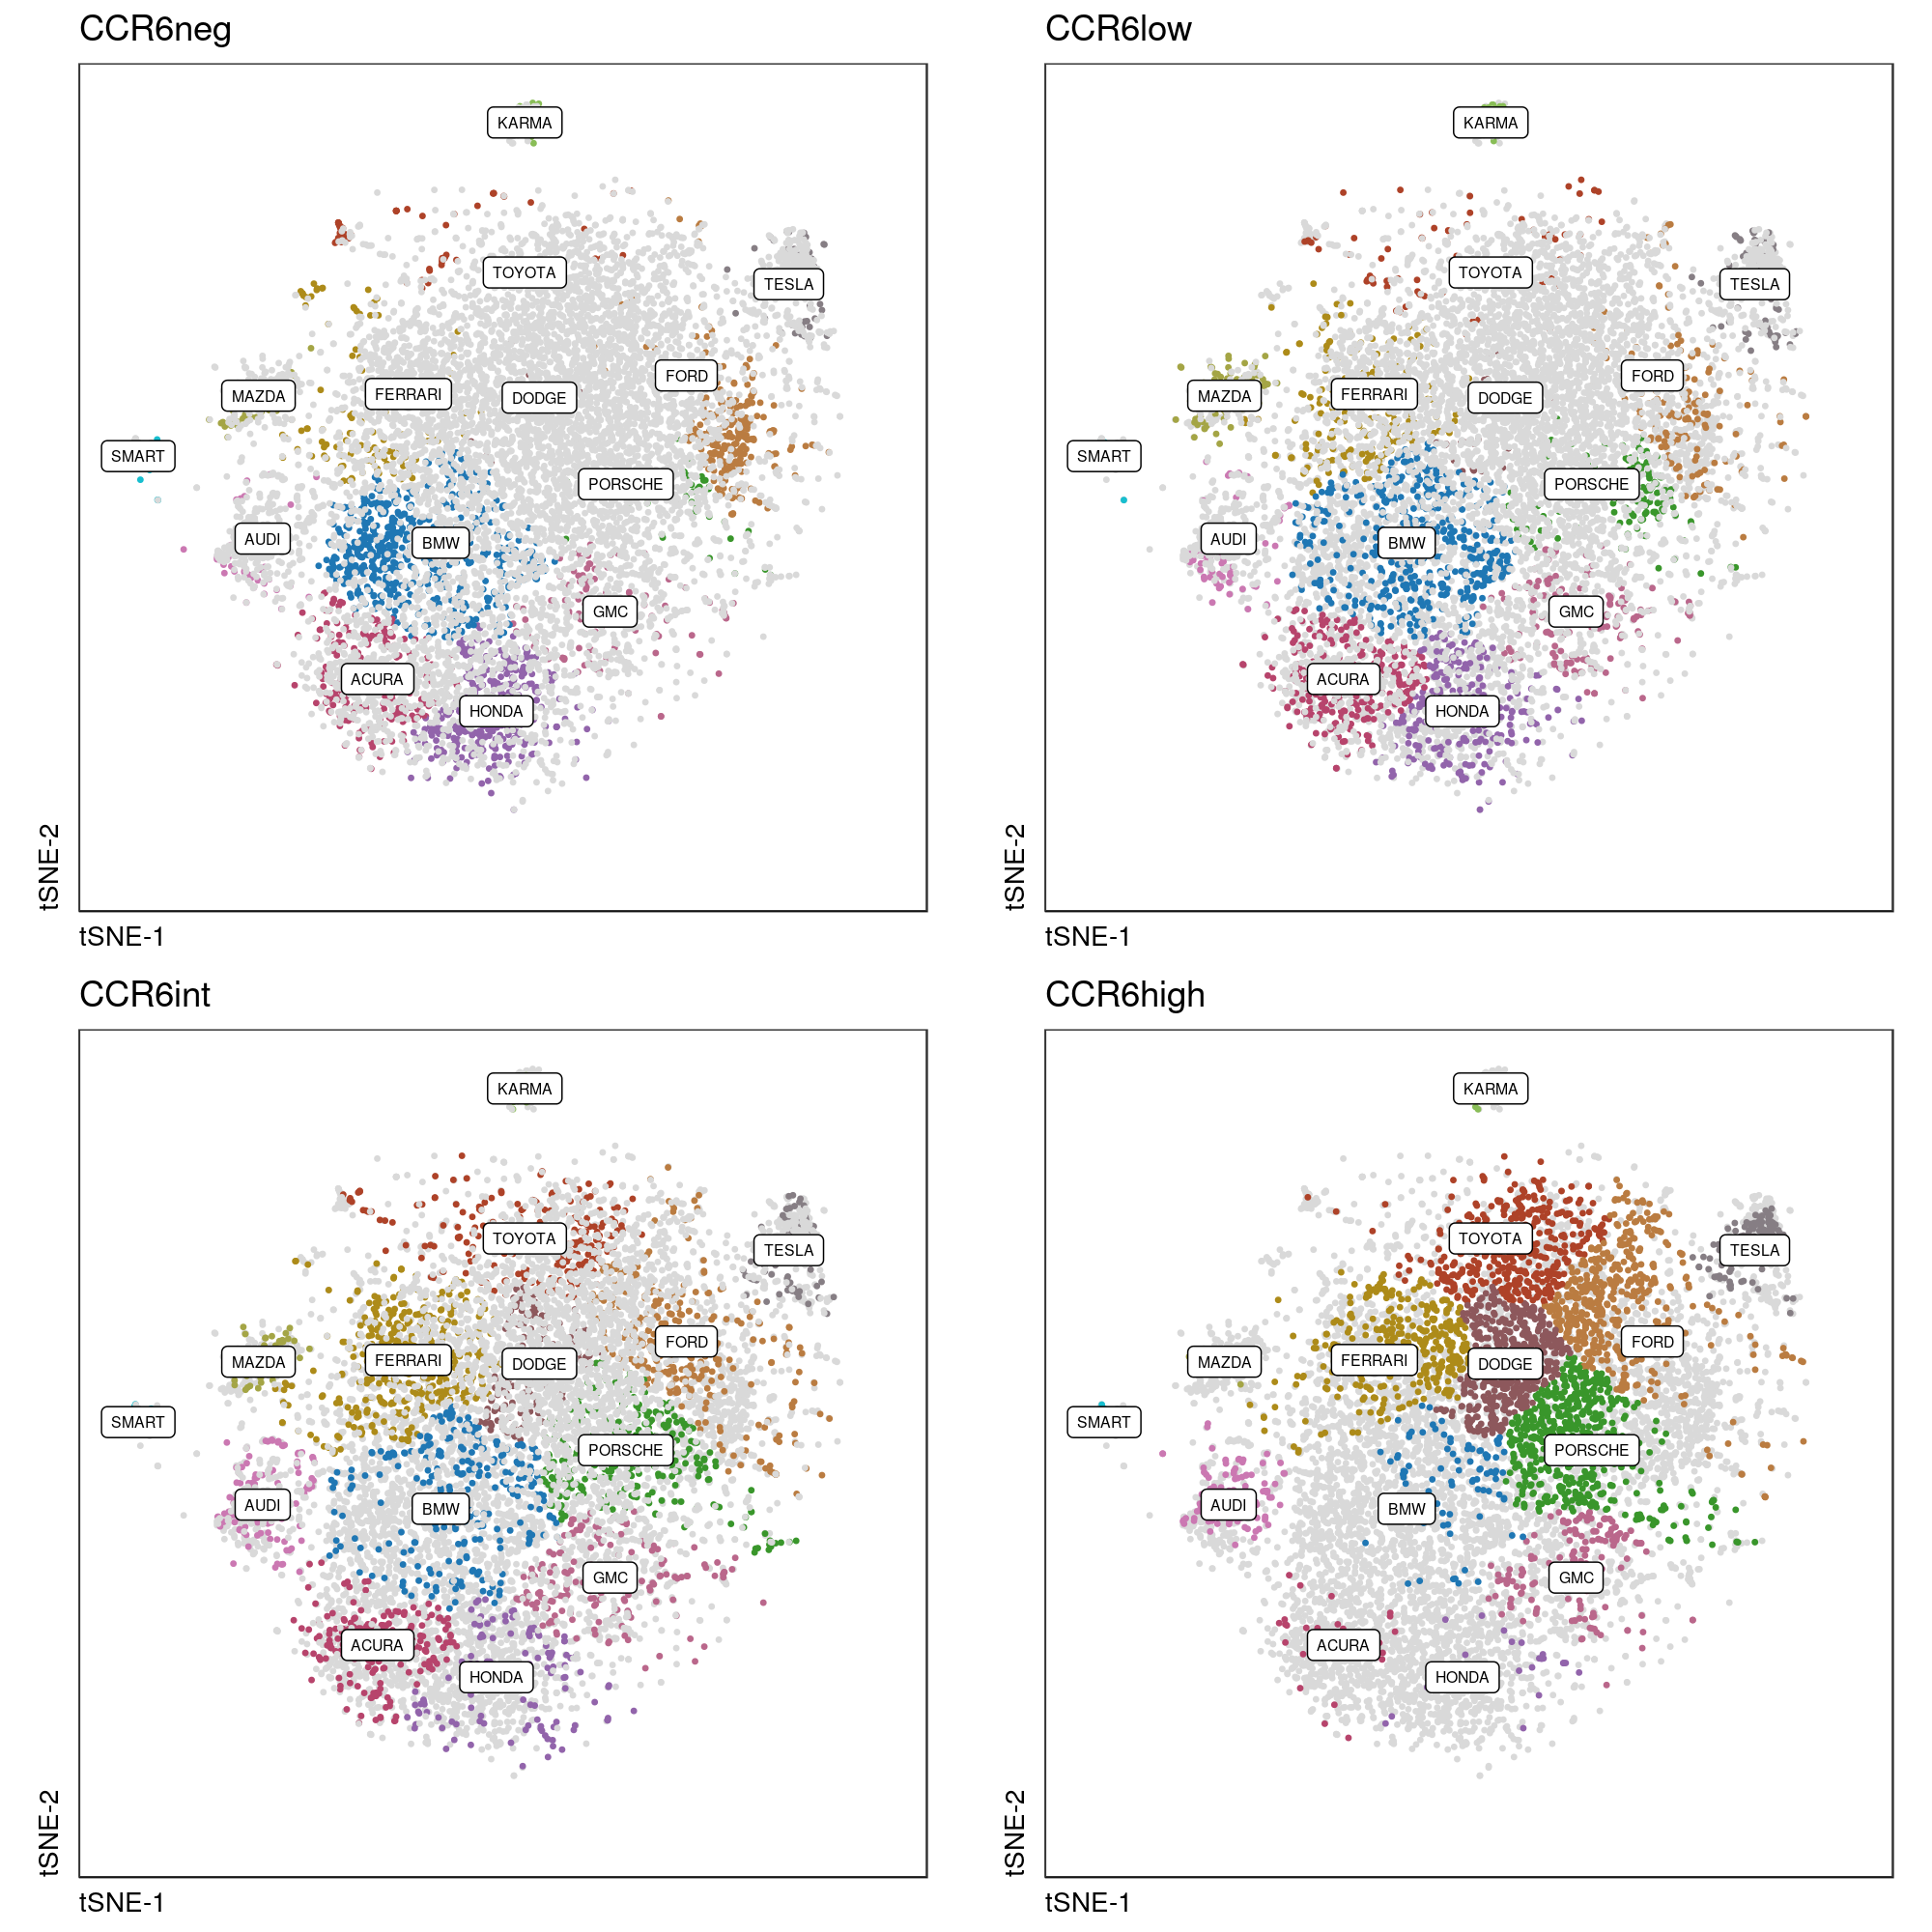

In [130]:
options(repr.plot.width = 10, repr.plot.height = 10,  repr.plot.res = 200)
plot_grid(CCR6neg_metadata_tSNE_ScatterPlot_Object,
          CCR6low_metadata_tSNE_ScatterPlot_Object,
          CCR6int_metadata_tSNE_ScatterPlot_Object,
          CCR6high_metadata_tSNE_ScatterPlot_Object, ncol=2)

In [115]:
##################
#Figure2-B
##################
group1 = c("DODGE","FERRARI", "PORSCHE", "TESLA", "TOYOTA", "FORD")
group2 = c("SMART", "MAZDA", "ACURA", "HONDA", "KARMA", "GMC", "AUDI", "BMW")

In [116]:
group1_metadata_tSNE_DF = metadata_tSNE_DF %>%
    filter(cluster_label %in% group1)
#
total_group1_DF = group1_metadata_tSNE_DF %>%
    group_by(orig.ident) %>% 
    summarize(total_subset_cell_count=n())
#
group2_metadata_tSNE_DF = metadata_tSNE_DF %>%
    filter(cluster_label %in% group2)
#
total_group2_DF = group2_metadata_tSNE_DF %>%
    group_by(orig.ident) %>% 
    summarize(total_subset_cell_count=n())
#
group1_cluster_abundance_DF = group1_metadata_tSNE_DF %>%
    group_by(orig.ident, cluster_label) %>% 
    summarise(Total = n()) %>%
    inner_join(total_group1_DF, by = c("orig.ident", "orig.ident"))
#head(group1_cluster_abundance_DF)
#
group2_cluster_abundance_DF = group2_metadata_tSNE_DF %>%
    group_by(orig.ident, cluster_label) %>% 
    summarise(Total = n()) %>%
    inner_join(total_group2_DF, by = c("orig.ident", "orig.ident"))
#head(group2_cluster_abundance_DF)

In [117]:
group1_cluster_composition = ggplot(data= group1_cluster_abundance_DF,
    aes(x=reorder(orig.ident, -Total/total_subset_cell_count*100), y=Total/total_subset_cell_count *100, fill=cluster_label)) +
    geom_bar(position="stack", stat = "identity", color="black", size = 0.25, na.rm = TRUE)  +
    scale_fill_manual(breaks = Feature_Order_List, labels=Feature_Label_Dict, values=Feature_Color_Dict) +
    scale_x_discrete(breaks = GroupID_Order_List, labels=GroupID_Order_List, limits=GroupID_Order_List) +
    scale_y_continuous(breaks = seq(0, 100, 20), limits = c(0,100), expand = c(0,0)) +
    theme_minimal() +
    labs(title = NULL, subtitle = NULL, caption = NULL, tag = NULL, x=NULL, y="% of population") +
    theme(
        text=element_text(family="sans"),
        plot.title = element_text(size=14, color = "black", face = "plain", hjust = 0),
        plot.subtitle = element_text(size=12, color = "black", face = "plain", hjust = 0 ),
        plot.caption = element_text(size=10, color = "black", face = "plain"),
        #X-AXIS
        axis.title.x = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5),
        axis.title.y = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5),
        axis.text.x = element_text(size=10,  family="sans", face="plain", color = "black", angle=0),
        axis.text.y = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
        axis.line.y = element_line(colour = "black"),
        axis.ticks.y = element_line(colour = "black"),
        axis.ticks.length=unit(.15, "cm"),
        axis.ticks.x = element_blank(),
        #Panel
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        
        #Strip
        strip.text = element_text(size=14, face="plain", color = "black"),
        strip.text.x = element_text(size=12, face="plain", color = "black"),
        strip.text.y = element_text(size=10, face="plain", color = "black"),
        strip.background = element_rect(color = "black", size = 0.25, fill = "grey95"),
        #LEGEND
        #legend.position="none",
        legend.title = element_blank(),
        legend.key=element_blank(),
        legend.text = element_text(size=10, face="bold", color = "black", angle=0, vjust=0.5),
        legend.background = element_blank(),

    )
##########
group2_cluster_composition = ggplot(data= group2_cluster_abundance_DF,
    aes(x=reorder(orig.ident, -Total/total_subset_cell_count*100), y=Total/total_subset_cell_count *100, fill=cluster_label)) +
    geom_bar(position="stack", stat = "identity", color="black", size = 0.25, na.rm = TRUE)  +
    scale_fill_manual(breaks = Feature_Order_List, labels=Feature_Label_Dict, values=Feature_Color_Dict) +
    scale_x_discrete(breaks = GroupID_Order_List, labels=GroupID_Order_List, limits=GroupID_Order_List) +
    scale_y_continuous(breaks = seq(0, 100, 20), limits = c(0,100), expand = c(0,0)) +
    theme_minimal() +
    labs(title = NULL, subtitle = NULL, caption = NULL, tag = NULL, x=NULL, y="% of population") +
    theme(
        text=element_text(family="sans"),
        plot.title = element_text(size=14, color = "black", face = "plain", hjust = 0),
        plot.subtitle = element_text(size=12, color = "black", face = "plain", hjust = 0 ),
        plot.caption = element_text(size=10, color = "black", face = "plain"),
        #X-AXIS
        axis.title.x = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5),
        axis.title.y = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5),
        axis.text.x = element_text(size=10,  family="sans", face="plain", color = "black", angle=0),
        axis.text.y = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
        axis.line.y = element_line(colour = "black"),
        axis.ticks.y = element_line(colour = "black"),
        axis.ticks.length=unit(.15, "cm"),
        axis.ticks.x = element_blank(),
        #Panel
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        
        #Strip
        strip.text = element_text(size=14, face="plain", color = "black"),
        strip.text.x = element_text(size=12, face="plain", color = "black"),
        strip.text.y = element_text(size=10, face="plain", color = "black"),
        strip.background = element_rect(color = "black", size = 0.25, fill = "grey95"),
        #LEGEND
        #legend.position="none",
        legend.title = element_blank(),
        legend.key=element_blank(),
        legend.text = element_text(size=10, face="bold", color = "black", angle=0, vjust=0.5),
        legend.background = element_blank(),

    )


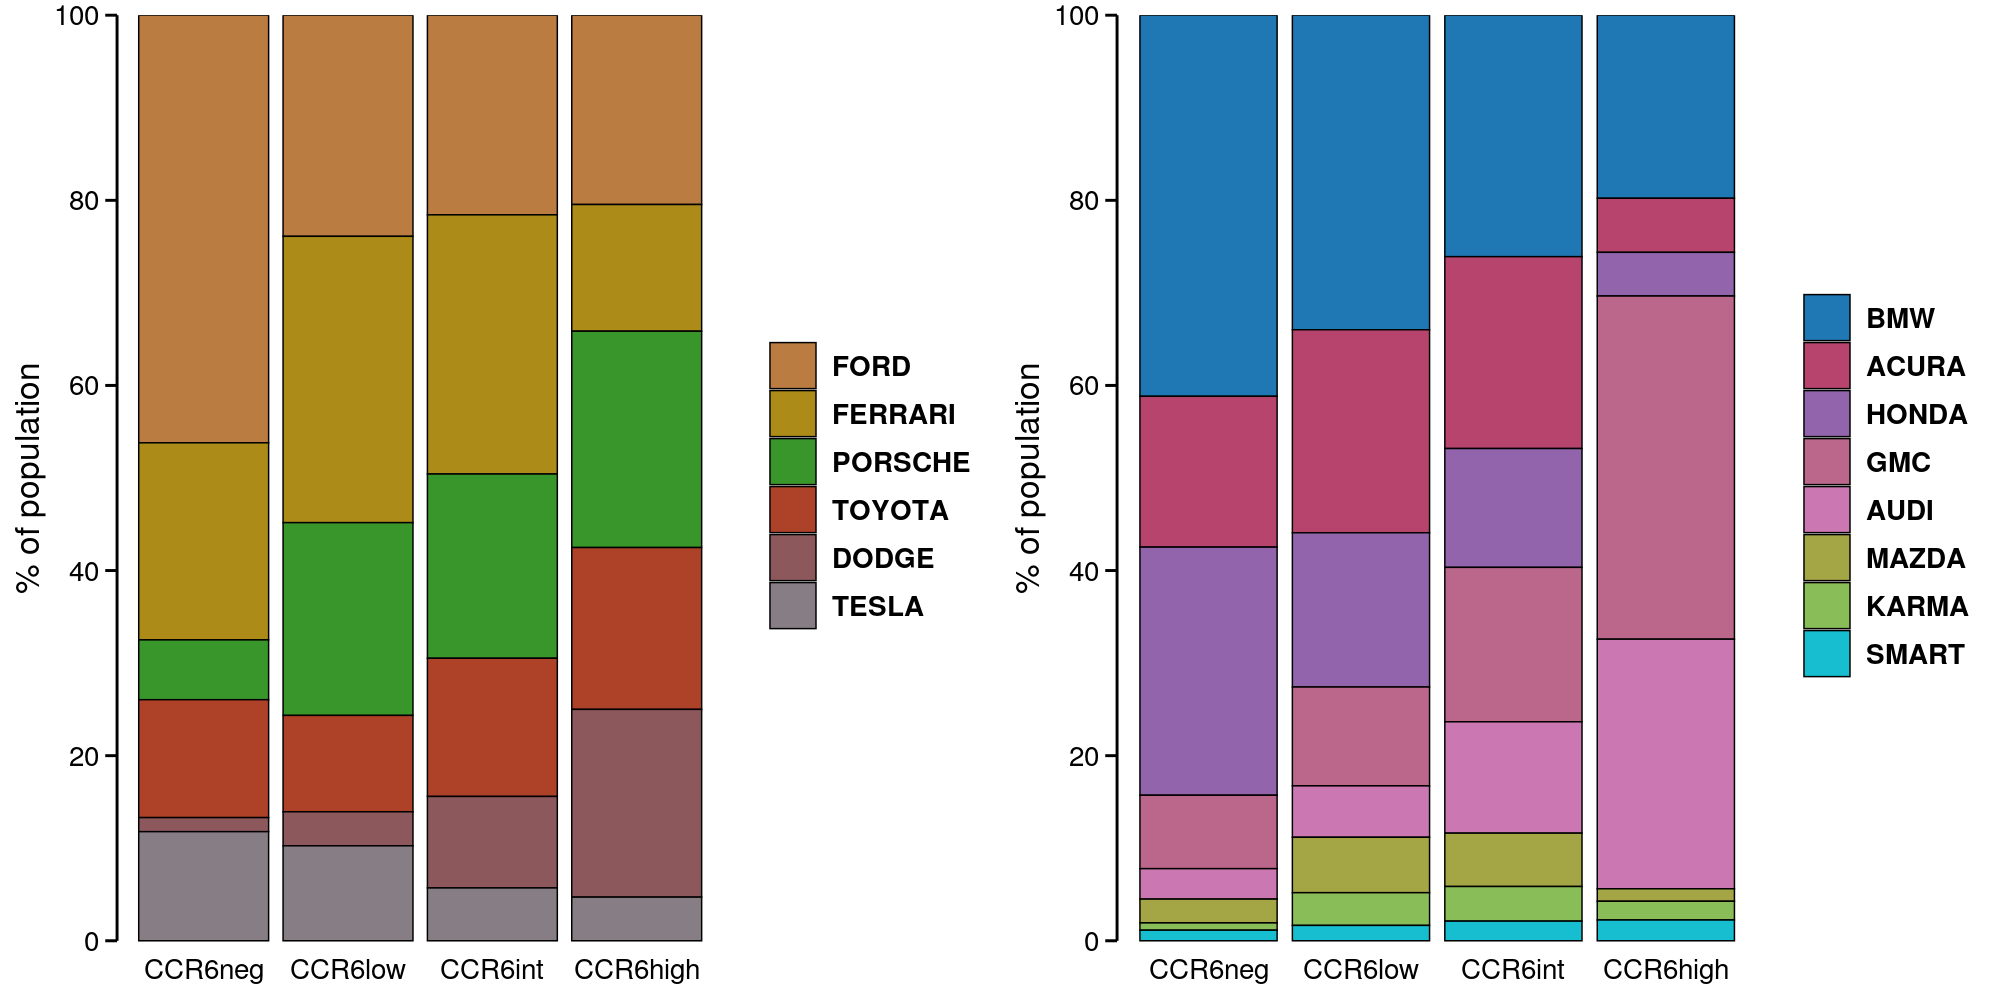

In [118]:
options(repr.plot.width = 10, repr.plot.height = 5,  repr.plot.res = 200)
plot_grid(group1_cluster_composition, group2_cluster_composition, ncol=2)

In [119]:
##################
#Figure2-C
##################
features_List = c("CCR6", "GNLY", "CCL5", "CXCR3", "KLRB1", "CD4", "LYAR", "PDE4D", "SESN3","PASK")

In [120]:
normalized_expression_DF = as.data.frame(alldata@assays$RNA@data) %>%
    rownames_to_column(var="GeneID")

In [121]:
gather_normalized_expression_DF = normalized_expression_DF %>%
    gather(UMI, expression, -GeneID) %>%
    filter(GeneID %in% features_List)
head(gather_normalized_expression_DF)

GeneID,UMI,expression
GNLY,CCR6neg_AAACCTGCAGTTCATG-1,0.000000
PASK,CCR6neg_AAACCTGCAGTTCATG-1,0.000000
LYAR,CCR6neg_AAACCTGCAGTTCATG-1,0.000000
PDE4D,CCR6neg_AAACCTGCAGTTCATG-1,1.257245
CCR6,CCR6neg_AAACCTGCAGTTCATG-1,0.000000
CXCR3,CCR6neg_AAACCTGCAGTTCATG-1,0.000000


In [122]:
scaled_gather_normalized_expression_DF = gather_normalized_expression_DF %>%
    mutate(log2_expression = log2(expression + 1)) %>%
    select(GeneID, UMI, log2_expression)
head(scaled_gather_normalized_expression_DF)

GeneID,UMI,log2_expression
GNLY,CCR6neg_AAACCTGCAGTTCATG-1,0.000000
PASK,CCR6neg_AAACCTGCAGTTCATG-1,0.000000
LYAR,CCR6neg_AAACCTGCAGTTCATG-1,0.000000
PDE4D,CCR6neg_AAACCTGCAGTTCATG-1,1.174563
CCR6,CCR6neg_AAACCTGCAGTTCATG-1,0.000000
CXCR3,CCR6neg_AAACCTGCAGTTCATG-1,0.000000


In [123]:
GroupID_Color_List = c("CCR6neg"="#FFA500", "CCR6low"="#0456f8", "CCR6int"="#1D8F06", "CCR6high"="#e51134")
GroupID_Order_List = c("CCR6neg", "CCR6low", "CCR6int", "CCR6high")

In [124]:
metadata_scaled_gather_normalized_expression_DF = metadata_tSNE_DF %>%
    inner_join(scaled_gather_normalized_expression_DF, by = c("UMI", "UMI"))
head(metadata_scaled_gather_normalized_expression_DF)

UMI,orig.ident,nCount_RNA,nFeature_RNA,percent_mito,percent_ribo,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.2,cluster_label,cluster_color,tSNE_1,tSNE_2,GeneID,log2_expression
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0,BMW,#1F77B4,1.213328,-7.427609,GNLY,0.000000
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0,BMW,#1F77B4,1.213328,-7.427609,PASK,0.000000
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0,BMW,#1F77B4,1.213328,-7.427609,LYAR,0.000000
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0,BMW,#1F77B4,1.213328,-7.427609,PDE4D,1.174563
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0,BMW,#1F77B4,1.213328,-7.427609,CCR6,0.000000
CCR6neg_AAACCTGCAGTTCATG-1,CCR6neg,3975,1182,4.477987,47.57233,2,0,0,BMW,#1F77B4,1.213328,-7.427609,CXCR3,0.000000


In [125]:
group1 = c("DODGE")
group2 = c("BMW")
group3 = c("FERRARI")

In [126]:
group1_metadata_scaled_gather_normalized_expression_DF = metadata_scaled_gather_normalized_expression_DF %>%
    filter(cluster_label %in% group1)
group2_metadata_scaled_gather_normalized_expression_DF = metadata_scaled_gather_normalized_expression_DF %>%
    filter(cluster_label %in% group2)
group3_metadata_scaled_gather_normalized_expression_DF = metadata_scaled_gather_normalized_expression_DF %>%
    filter(cluster_label %in% group3)

In [127]:
group1_ViolinPlot_Object = ggplot(group1_metadata_scaled_gather_normalized_expression_DF, aes(x=orig.ident, y=log2_expression, label=orig.ident, fill = orig.ident, order=GeneID), color="black") +
#geom_boxplot(stat = "boxplot", position = "dodge2", aes(fill=GroupID), outlier.shape=NA, size = 0.25, show.legend=FALSE, color="black", fatten = 0.5) + 
geom_violin(aes(fill = orig.ident), scale="width", size = 0.25) +
scale_fill_manual(values=GroupID_Color_List) +
scale_x_discrete(breaks = GroupID_Order_List, labels=GroupID_Order_List, limits=GroupID_Order_List) +
labs(title = "DODGE", subtitle = NULL, caption = NULL, tag = NULL, x=NULL, y="Expression (log2)") +
theme_minimal() +
annotate("segment", x=-Inf, xend=Inf, y=-Inf, yend=-Inf)+
theme(
    #Title
    text=element_text(size=8,  family="sans", face="plain"),
    plot.title = element_text(size=15,  family="sans", face="bold", hjust = 0.5),
    plot.subtitle = element_text(size=10,  family="sans", face="plain", hjust = 0.5),
    plot.caption = element_text(size=8,  family="sans", face="plain", color = "black", hjust = 1),
    #Axis
    
    axis.title.x = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5),
    axis.title.y = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5, vjust=0),
    axis.text.x = element_text(size=10,  family="sans", face="plain", color = "black", angle=45, vjust=0.5),
    axis.text.y = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
    axis.line = element_line(colour = "black"),
    #Panel
    #panel.grid.major = element_line(color = "grey95", size = 0.25), 
    #panel.grid.minor = element_line(color = "grey95", size = 0.25),
    #panel.background = element_rect(color = "black", size = 0.25, fill = "grey99"),
    #panel.border = element_rect(color = "black", size = 0.25, fill = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    #Strip
    #strip.text = element_text(size=10,  family="sans", face="plain", color = "black"),
    strip.text.x = element_text(size=12,  family="sans", face="bold", color = "black"),
    #strip.text.y = element_text(size=12,  family="sans", face="plain", color = "black"),
    #strip.background = element_rect(color = "black", size = 0.25, fill = "grey95"),
    #Legend
    legend.position="none",
    legend.title = element_blank(),
    legend.key=element_blank(),
    legend.text = element_text(size=8,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
    legend.background = element_blank(),
    #aspect.ratio = 1,
) +
facet_wrap(~GeneID, ncol=2, scales ='free_y')
############################
group2_ViolinPlot_Object = ggplot(group2_metadata_scaled_gather_normalized_expression_DF, aes(x=orig.ident, y=log2_expression, label=orig.ident, fill = orig.ident, order=GeneID), color="black") +
#geom_boxplot(stat = "boxplot", position = "dodge2", aes(fill=GroupID), outlier.shape=NA, size = 0.25, show.legend=FALSE, color="black", fatten = 0.5) + 
geom_violin(aes(fill = orig.ident), scale="width", size = 0.25) +
scale_fill_manual(values=GroupID_Color_List) +
scale_x_discrete(breaks = GroupID_Order_List, labels=GroupID_Order_List, limits=GroupID_Order_List) +
labs(title = "BMW", subtitle = NULL, caption = NULL, tag = NULL, x=NULL, y=NULL) +
theme_minimal() +
annotate("segment", x=-Inf, xend=Inf, y=-Inf, yend=-Inf)+
theme(
    #Title
    text=element_text(size=8,  family="sans", face="plain"),
    plot.title = element_text(size=15,  family="sans", face="bold", hjust = 0.5),
    plot.subtitle = element_text(size=10,  family="sans", face="plain", hjust = 0.5),
    plot.caption = element_text(size=8,  family="sans", face="plain", color = "black", hjust = 1),
    #Axis
    
    axis.title.x = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5),
    axis.title.y = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5, vjust=0),
    axis.text.x = element_text(size=10,  family="sans", face="plain", color = "black", angle=45, vjust=0.5),
    axis.text.y = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
    axis.line = element_line(colour = "black"),
    #Panel
    #panel.grid.major = element_line(color = "grey95", size = 0.25), 
    #panel.grid.minor = element_line(color = "grey95", size = 0.25),
    #panel.background = element_rect(color = "black", size = 0.25, fill = "grey99"),
    #panel.border = element_rect(color = "black", size = 0.25, fill = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    #Strip
    #strip.text = element_text(size=10,  family="sans", face="plain", color = "black"),
    strip.text.x = element_text(size=12,  family="sans", face="bold", color = "black"),
    #strip.text.y = element_text(size=12,  family="sans", face="plain", color = "black"),
    #strip.background = element_rect(color = "black", size = 0.25, fill = "grey95"),
    #Legend
    legend.position="none",
    legend.title = element_blank(),
    legend.key=element_blank(),
    legend.text = element_text(size=8,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
    legend.background = element_blank(),
    #aspect.ratio = 1,
) +
facet_wrap(~GeneID, ncol=2, scales ='free_y')
############################
group3_ViolinPlot_Object = ggplot(group3_metadata_scaled_gather_normalized_expression_DF, aes(x=orig.ident, y=log2_expression, label=orig.ident, fill = orig.ident, order=GeneID), color="black") +
#geom_boxplot(stat = "boxplot", position = "dodge2", aes(fill=GroupID), outlier.shape=NA, size = 0.25, show.legend=FALSE, color="black", fatten = 0.5) + 
geom_violin(aes(fill = orig.ident), scale="width", size = 0.25) +
scale_fill_manual(values=GroupID_Color_List) +
scale_x_discrete(breaks = GroupID_Order_List, labels=GroupID_Order_List, limits=GroupID_Order_List) +
labs(title = "FERRARI", subtitle = NULL, caption = NULL, tag = NULL, x=NULL, y=NULL) +
theme_minimal() +
annotate("segment", x=-Inf, xend=Inf, y=-Inf, yend=-Inf)+
theme(
    #Title
    text=element_text(size=8,  family="sans", face="plain"),
    plot.title = element_text(size=15,  family="sans", face="bold", hjust = 0.5),
    plot.subtitle = element_text(size=10,  family="sans", face="plain", hjust = 0.5),
    plot.caption = element_text(size=8,  family="sans", face="plain", color = "black", hjust = 1),
    #Axis
    
    axis.title.x = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5),
    axis.title.y = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5, vjust=0),
    axis.text.x = element_text(size=10,  family="sans", face="plain", color = "black", angle=45, vjust=0.5),
    axis.text.y = element_text(size=10,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
    axis.line = element_line(colour = "black"),
    #Panel
    #panel.grid.major = element_line(color = "grey95", size = 0.25), 
    #panel.grid.minor = element_line(color = "grey95", size = 0.25),
    #panel.background = element_rect(color = "black", size = 0.25, fill = "grey99"),
    #panel.border = element_rect(color = "black", size = 0.25, fill = NA),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    #Strip
    #strip.text = element_text(size=10,  family="sans", face="plain", color = "black"),
    strip.text.x = element_text(size=12,  family="sans", face="bold", color = "black"),
    #strip.text.y = element_text(size=12,  family="sans", face="plain", color = "black"),
    #strip.background = element_rect(color = "black", size = 0.25, fill = "grey95"),
    #Legend
    legend.position="none",
    legend.title = element_blank(),
    legend.key=element_blank(),
    legend.text = element_text(size=8,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
    legend.background = element_blank(),
    #aspect.ratio = 1,
) +
facet_wrap(~GeneID, ncol=2, scales ='free_y')

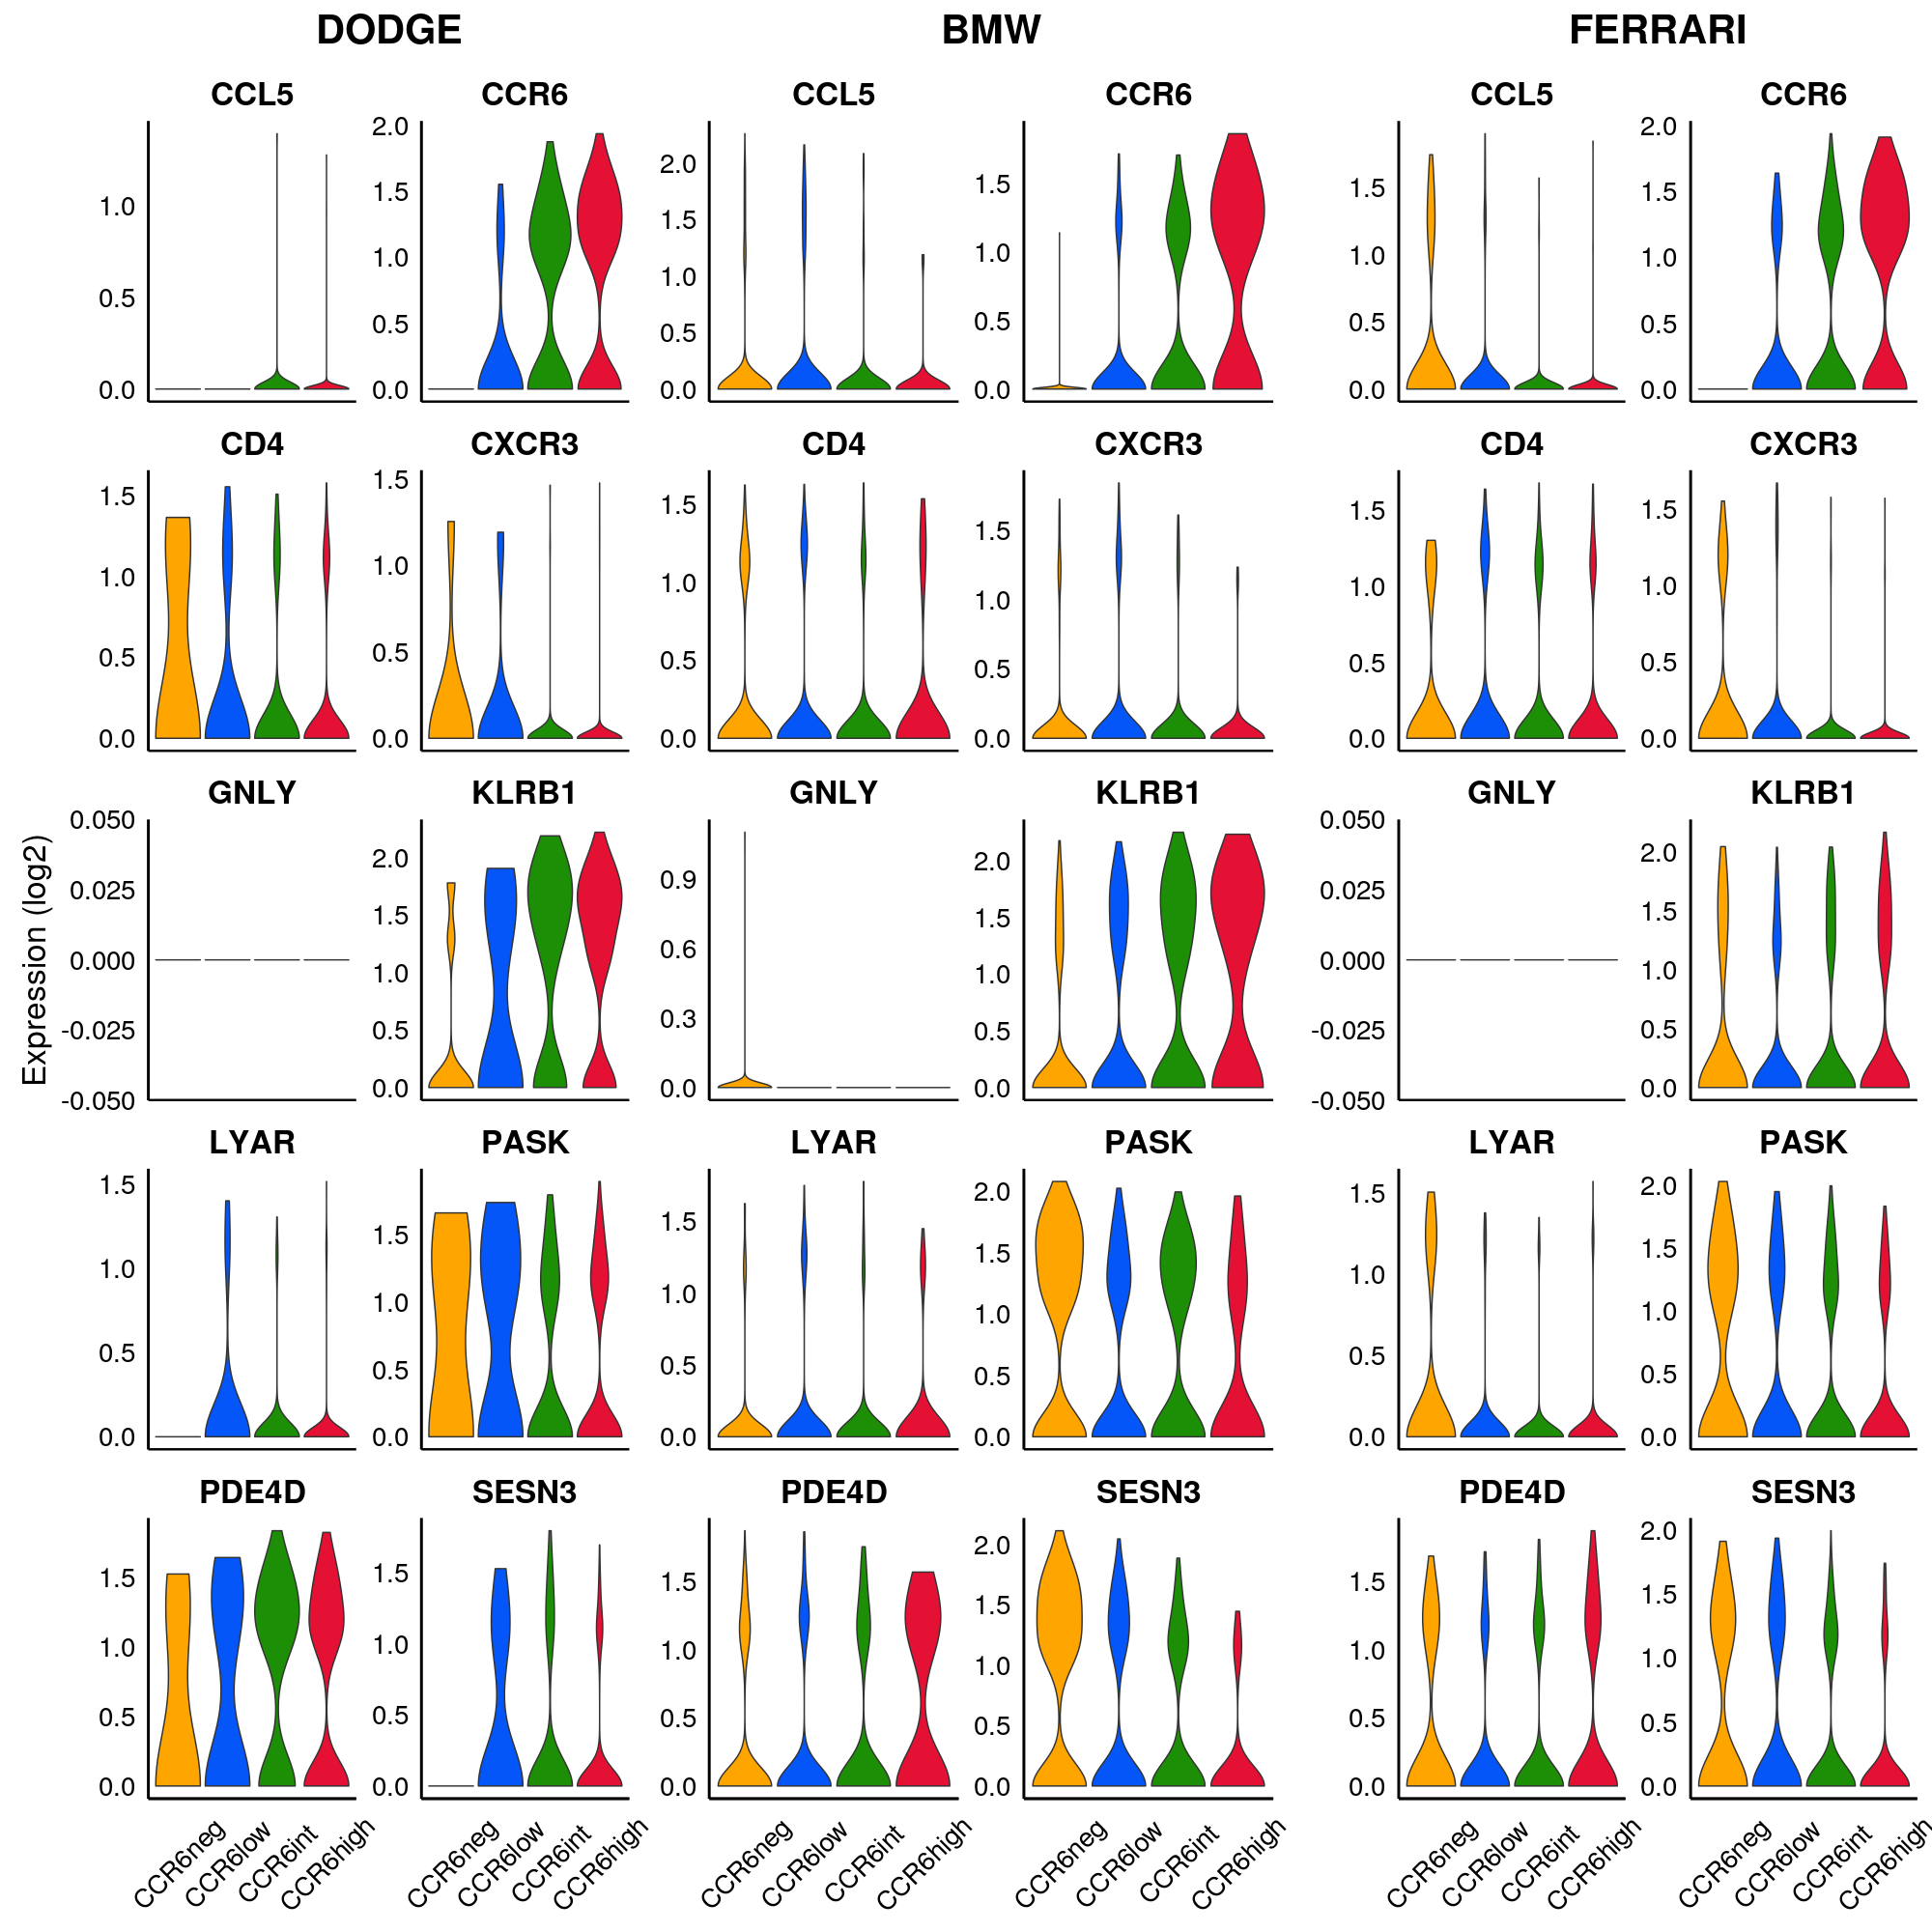

In [128]:
options(repr.plot.width = 10, repr.plot.height = 10,  repr.plot.res = 200)
plot_grid(group1_ViolinPlot_Object, group2_ViolinPlot_Object, group3_ViolinPlot_Object, ncol=3)